In [ ]:
# %cd /content/drive/MyDrive/Colab Notebooks/Kaggle_Project/Credit score classification
# !unzip "/content/drive/MyDrive/Colab Notebooks/Kaggle_Project/Credit score classification/archive.zip"


## 1.Import Data and Required Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats as st

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 35)

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_recall_curve, ConfusionMatrixDisplay, accuracy_score
from imblearn.over_sampling import SMOTE

In [5]:
!pip install xgboost

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

## 2.Data Understanding

In [7]:
trainpath = "C:/Users/PONNIVAVA/Desktop/crediscore/train.csv"
testpath = "C:/Users/PONNIVAVA/Desktop/crediscore/test.csv"

df = pd.read_csv(trainpath)
test_df = pd.read_csv(testpath)


In [8]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [9]:
df.shape

(100000, 28)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [11]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


Change type to category

In [12]:
cat_cols = ['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
df[cat_cols] = df[cat_cols].astype('category')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   ID                        100000 non-null  object  
 1   Customer_ID               100000 non-null  object  
 2   Month                     100000 non-null  category
 3   Name                      90015 non-null   object  
 4   Age                       100000 non-null  object  
 5   SSN                       100000 non-null  object  
 6   Occupation                100000 non-null  category
 7   Annual_Income             100000 non-null  object  
 8   Monthly_Inhand_Salary     84998 non-null   float64 
 9   Num_Bank_Accounts         100000 non-null  int64   
 10  Num_Credit_Card           100000 non-null  int64   
 11  Interest_Rate             100000 non-null  int64   
 12  Num_of_Loan               100000 non-null  object  
 13  Type_of_Loan              8859

## 3.Data Cleaning

- There are few columns that should be numerical but represented as object. **'Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit', 'Outstanding_Debt'** etc
- For categorical values we will replace null and wrong information with mode per customer
- For numerical values we will replace null and wrong information with forward/backward or mean
- Drop redundant columns 'ID', 'Name', 'SSN', 'Type_of_Loan', 'Occupation', 'Customer_ID'
- Replace wrong info ("!@9#%8", "_", "__") with Null

### 3.1 Check null

In [15]:
nv = round(df.isna().sum()/df.shape[0]*100 , 4)
nv

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

In [16]:
nv[nv > 0]

Name                        9.985
Monthly_Inhand_Salary      15.002
Type_of_Loan               11.408
Num_of_Delayed_Payment      7.002
Num_Credit_Inquiries        1.965
Credit_History_Age          9.030
Amount_invested_monthly     4.479
Monthly_Balance             1.200
dtype: float64

### 3.2 Check Duplicates

In [17]:
df.duplicated().sum()

0

### 3.3 Checking for unique values


In [18]:
df.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

### 3.4 Drop redundant columns

In [19]:
df.drop(['ID', 'Name', 'SSN', 'Type_of_Loan'], axis=1, inplace=True)

### 3.5 Handle Categorical variables

In [21]:
for c in cl:
  print(c)
  print(df[c].value_counts())
  print()

Month
April       12500
August      12500
February    12500
January     12500
July        12500
June        12500
March       12500
May         12500
Name: Month, dtype: int64

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: Credit_Mix, dtype: int64

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_

In [22]:
cl = list(df.select_dtypes('category').columns)

For `Credit_Mix` replace `_` with NaN

`Payment_Behaviour` replace `!@9#%8` with Nan

In [23]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].apply(lambda x: np.NaN if x == "!@9#%8" else x)
df['Credit_Mix'] = df['Credit_Mix'].apply(lambda x: np.NaN if x == "_" else x)

### 3.6 Handle Numerical variables

In [24]:
cols=['Age','Annual_Income','Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit', 'Outstanding_Debt']
for col in cols:
  df[col] = df[col].apply(lambda x: x if x is np.nan or not isinstance(x, str)
                      else x.replace("_","")).replace("",np.nan)
  df[col] = df[col].astype('float')

### 3.5 Impute and clean

In [25]:
nv = round(df.isna().sum()/df.shape[0]*100 , 4)
nv[nv > 0]

Monthly_Inhand_Salary      15.002
Num_of_Delayed_Payment      7.002
Changed_Credit_Limit        2.091
Num_Credit_Inquiries        1.965
Credit_Mix                 20.195
Credit_History_Age          9.030
Amount_invested_monthly     4.479
Payment_Behaviour           7.600
Monthly_Balance             1.200
dtype: float64

#### `Monthly_Inhand_Salary` column

In [26]:
df['Monthly_Inhand_Salary'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda v: v.mean())
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].astype('float')

#### `Num_of_Delayed_Payment` column

In [27]:
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda v: v.ffill())
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda v: v.bfill())

#### **`Amount_invested_monthly` column**

- This column contains few values starts with __ i.e `__10000__` We can impue those with mean value

In [28]:
def return_null(val):
  if isinstance(val, str) and "__" in val:
    return np.NaN
  else:
    return val

In [29]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].apply(return_null)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype('float')

In [30]:
df['Amount_invested_monthly'] = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda v: v.mean())

#### `Num_Credit_Inquiries` column

In [31]:
df['Num_Credit_Inquiries'].quantile([0.10, 0.85, 0.98, 0.985, 0.99])

0.100       1.00
0.850      11.00
0.980      16.00
0.985     298.49
0.990    1109.28
Name: Num_Credit_Inquiries, dtype: float64

In [32]:
df['Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda v: v.median())
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].astype('float')

#### `Monthly_Balance` column

In [33]:
df['Monthly_Balance'] = df['Monthly_Balance'].apply(return_null)
df['Monthly_Balance'] = df['Monthly_Balance'].astype('float')

In [34]:
df['Monthly_Balance'] = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda v: v.mean())

`Payment_Behaviour, Credit_Mix and Changed_Credit_Limit` column

In [35]:
df['Payment_Behaviour'] = df.groupby('Customer_ID')['Payment_Behaviour'].apply(lambda x: x.fillna(x.mode()[0]))
df['Credit_Mix'] = df.groupby('Customer_ID')['Credit_Mix'].apply(lambda x: x.fillna(x.mode()[0]))

In [36]:
df['Changed_Credit_Limit'] = df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda v: v.mode()[0])

#### `Credit_History_Age` column

In [37]:
import re
def cal_history_age(val):
  try:
    year, month = 0, 0
    if re.search('year', val, re.IGNORECASE):
      year = int(re.findall('\d+', val)[0])
    if re.search('month', val, re.IGNORECASE):
      month = int(re.findall('\d+', val)[1])
    return year*12+month
  except:
    return np.NaN

In [38]:
df['Credit_History_Age'] = df['Credit_History_Age'].apply(cal_history_age)

In [39]:
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.ffill())
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.bfill())
df['Credit_History_Age'] = df['Credit_History_Age'].astype('float')

#### `Age` column

As we can see there are some negative values as well as vlues greater than 100. Let's handle those values

In [40]:
df.select_dtypes('object').head(3)

,Customer_ID,Credit_Mix,Payment_Behaviour
0,CUS_0xd40,Good,High_spent_Small_value_payments
1,CUS_0xd40,Good,Low_spent_Large_value_payments
2,CUS_0xd40,Good,Low_spent_Medium_value_payments


In [41]:
def clean_age(x):
  if x > 100 or x <=0:
    return np.NaN
  return x

In [42]:
df['Age'] = df['Age'].apply(lambda x: x if x is np.nan or not isinstance(x, str)
                    else x.replace("_","")).replace("",np.nan)
df['Age'] = df['Age'].astype('float')

In [43]:
df['Age'] = df['Age'].apply(clean_age)
df['Age'] = df.groupby('Customer_ID')['Age'].transform(lambda v: v.mode()[0])

In [44]:
nv = round(df.isna().sum()/df.shape[0]*100 , 4)
nv[nv > 0]

Series([], dtype: float64)

In [45]:
cat_cols = ['Credit_Mix', 'Payment_Behaviour']
df[cat_cols] = df[cat_cols].astype('category')

In [46]:
df.shape

(100000, 24)

## 4 Sanity checks

In [47]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.274560,1.764157e+05,4198.468568,17.091280,22.47443,72.466040,3.009960,21.068780,30.690700,10.393543,5.794600,1426.220376,32.285173,221.136220,1403.118217,195.751837,403.120320
std,10.764438,1.429618e+06,3187.031426,117.404834,129.05741,466.422621,62.647879,14.860104,224.881705,6.512529,3.831618,1155.129026,5.116875,99.680454,8306.041270,136.842331,175.470745
min,14.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-5.010000,0.000000,0.230000,20.000000,1.000000,0.000000,14.528879,92.841401
25%,24.000000,1.945750e+04,1625.744479,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.500000,3.000000,566.072500,28.052567,144.000000,30.306660,97.690749,284.546710
50%,33.000000,3.757861e+04,3097.016667,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.340000,5.000000,1166.155000,32.305784,219.000000,69.249473,152.081485,338.491580
75%,42.000000,7.279092e+04,5961.664375,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.672500,8.500000,1945.962500,36.496663,302.000000,161.224249,257.566585,465.372970
max,56.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,82331.000000,1005.847285,1349.264887


- By looking `min and max` values from above info we can see that there are some `illogical values.`
- We can perform sanity checks and correct those values for following columns

 - Num_Bank_Accounts done
 - Num_Credit_Card
 - Interest_Rate
 - Num_of_Loan
 - Delay_from_due_date
 - Num_of_Delayed_Payment
 - Total_EMI_per_month

### `Num_Bank_Accounts`

In [48]:
df['Num_Bank_Accounts'].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

Num_Bank_Accounts can not be negative

In [49]:
df['Num_Bank_Accounts'].replace(-1, 0, inplace=True)

In [50]:
df['Num_Bank_Accounts'].value_counts(ascending=False).head(15)

6       13001
7       12823
8       12765
4       12186
5       12118
3       11950
9        5443
10       5247
1        4490
0        4349
2        4304
11          9
803         7
1668        5
105         5
Name: Num_Bank_Accounts, dtype: int64

We can see that Num_Bank_Accounts are in range of 0 to 1798. Account number greatert than 11 is clearly wrong entry.
Replace those entries with mode as per each customer

In [51]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: np.NaN if x>10 else x)
df['Num_Bank_Accounts'] = df.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda v: v.mode()[0])

### `Num_Credit_Card`

In [52]:
df['Num_Credit_Card'].describe()

count    100000.00000
mean         22.47443
std         129.05741
min           0.00000
25%           4.00000
50%           5.00000
75%           7.00000
max        1499.00000
Name: Num_Credit_Card, dtype: float64

In [53]:
df['Num_Credit_Card'].value_counts(ascending=False).head(15)

5      18459
7      16615
6      16559
4      14030
3      13277
8       4956
10      4860
9       4643
2       2149
1       2132
11        36
0         13
849        8
852        7
183        6
Name: Num_Credit_Card, dtype: int64

In [54]:
df['Num_Credit_Card'] = df['Num_Credit_Card'].apply(lambda x: np.NaN if x>10 else x)
df['Num_Credit_Card'] = df.groupby('Customer_ID')['Num_Credit_Card'].transform(lambda v: v.mode()[0])

### `Interest_Rate`

In [55]:
df['Interest_Rate'].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

Normal interest rate is in between 5-30%. We will impute wring entries

In [56]:
df['Interest_Rate'] = df['Interest_Rate'].apply(lambda x: np.NaN if x>30 else x)
df['Interest_Rate'].replace(np.NaN, 0, inplace=True)

In [57]:
mode_emi = df.groupby(['Customer_ID'])['Interest_Rate'].agg(st.mode).apply(lambda x:x[0][0])
df.drop("Interest_Rate",axis=1,inplace=True)
df = pd.merge(left=df,right=mode_emi,how="left",left_on="Customer_ID",right_index=True)

### `Num_of_Loan`

In [58]:
df['Num_of_Loan'].value_counts(ascending=False).head(15)

 3.0       15104
 2.0       15032
 4.0       14743
 0.0       10930
 1.0       10606
 6.0        7803
 7.0        7344
 5.0        7197
-100.0      3876
 9.0        3702
 8.0        3191
 1150.0        4
 1228.0        3
 1480.0        3
 288.0         3
Name: Num_of_Loan, dtype: int64

Number_of_loan can not be negative

In [59]:
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: np.NaN if (x>10 or x<0) else x)
df['Num_of_Loan'] = df.groupby('Customer_ID')['Num_of_Loan'].transform(lambda v: v.mode()[0])

### `Num_of_Delayed_Payment`

Num_of_Delayed_Payment can not be greater than 30

In [60]:
df['Num_of_Delayed_Payment'].describe()

count    100000.000000
mean         30.690700
std         224.881705
min          -3.000000
25%           9.000000
50%          14.000000
75%          18.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [61]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: np.NaN if (x>30 or x<0) else x)
df['Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda v: v.mode()[0])

### `Total_EMI_per_month`

In [62]:
df['Total_EMI_per_month'].describe()

count    100000.000000
mean       1403.118217
std        8306.041270
min           0.000000
25%          30.306660
50%          69.249473
75%         161.224249
max       82331.000000
Name: Total_EMI_per_month, dtype: float64

In [63]:
mode_emi = df.groupby(['Customer_ID'])['Total_EMI_per_month'].agg(st.mode).apply(lambda x:x[0][0])

df.drop("Total_EMI_per_month",axis=1,inplace=True)
df = pd.merge(left=df,right=mode_emi,how="left",left_on="Customer_ID",right_index=True)

In [64]:
df['Total_EMI_per_month'].describe()

count    100000.000000
mean        105.543371
std         125.810030
min           0.000000
25%          29.049047
50%          66.033915
75%         145.582332
max        1779.103254
Name: Total_EMI_per_month, dtype: float64

### `Delay_from_due_date`

In [65]:
df['Delay_from_due_date'].describe()

count    100000.000000
mean         21.068780
std          14.860104
min          -5.000000
25%          10.000000
50%          18.000000
75%          28.000000
max          67.000000
Name: Delay_from_due_date, dtype: float64

In [66]:
nv = round(df.isna().sum()/df.shape[0]*100 , 4)
nv[nv > 0]

Series([], dtype: float64)

In [67]:
df.shape

(100000, 24)

## 5.EDA

In [68]:
df.drop(['Customer_ID', 'Month', 'Occupation'], axis=1, inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Age                       100000 non-null  float64 
 1   Annual_Income             100000 non-null  float64 
 2   Monthly_Inhand_Salary     100000 non-null  float64 
 3   Num_Bank_Accounts         100000 non-null  float64 
 4   Num_Credit_Card           100000 non-null  float64 
 5   Num_of_Loan               100000 non-null  float64 
 6   Delay_from_due_date       100000 non-null  int64   
 7   Num_of_Delayed_Payment    100000 non-null  float64 
 8   Changed_Credit_Limit      100000 non-null  float64 
 9   Num_Credit_Inquiries      100000 non-null  float64 
 10  Credit_Mix                100000 non-null  category
 11  Outstanding_Debt          100000 non-null  float64 
 12  Credit_Utilization_Ratio  100000 non-null  float64 
 13  Credit_History_Age        1000

In [70]:
df.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Interest_Rate,Total_EMI_per_month
0,23.0,19114.12,1824.843333,3.0,4.0,4.0,3,4.0,11.27,4.0,Good,809.98,26.822620,265.0,No,98.35409,High_spent_Small_value_payments,304.555294,Good,3.0,49.574949
1,23.0,19114.12,1824.843333,3.0,4.0,4.0,-1,4.0,11.27,4.0,Good,809.98,31.944960,265.0,No,98.35409,Low_spent_Large_value_payments,304.555294,Good,3.0,49.574949
2,23.0,19114.12,1824.843333,3.0,4.0,4.0,3,4.0,11.27,4.0,Good,809.98,28.609352,267.0,No,98.35409,Low_spent_Medium_value_payments,304.555294,Good,3.0,49.574949
3,23.0,19114.12,1824.843333,3.0,4.0,4.0,5,4.0,11.27,4.0,Good,809.98,31.377862,268.0,No,98.35409,Low_spent_Small_value_payments,304.555294,Good,3.0,49.574949
4,23.0,19114.12,1824.843333,3.0,4.0,4.0,6,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,98.35409,High_spent_Medium_value_payments,304.555294,Good,3.0,49.574949


In [71]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Interest_Rate,Total_EMI_per_month
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.274560,1.764157e+05,4198.468568,5.367840,5.532320,3.532880,21.068780,13.262720,10.393543,5.794600,1426.220376,32.285173,221.136220,195.751837,403.120320,12.489280,105.543371
std,10.764438,1.429618e+06,3187.031426,2.592597,2.066543,2.446356,14.860104,6.200852,6.512529,3.831618,1155.129026,5.116875,99.680454,136.842331,175.470745,8.072728,125.810030
min,14.000000,7.005930e+03,303.645417,0.000000,0.000000,0.000000,-5.000000,0.000000,-5.010000,0.000000,0.230000,20.000000,1.000000,14.528879,92.841401,0.000000,0.000000
25%,24.000000,1.945750e+04,1625.744479,3.000000,4.000000,2.000000,10.000000,9.000000,5.500000,3.000000,566.072500,28.052567,144.000000,97.690749,284.546710,6.000000,29.049047
50%,33.000000,3.757861e+04,3097.016667,5.000000,5.000000,3.000000,18.000000,14.000000,9.340000,5.000000,1166.155000,32.305784,219.000000,152.081485,338.491580,11.000000,66.033915
75%,42.000000,7.279092e+04,5961.664375,7.000000,7.000000,5.000000,28.000000,18.000000,14.672500,8.500000,1945.962500,36.496663,302.000000,257.566585,465.372970,18.000000,145.582332
max,56.000000,2.419806e+07,15204.633333,10.000000,10.000000,9.000000,67.000000,28.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1005.847285,1349.264887,30.000000,1779.103254


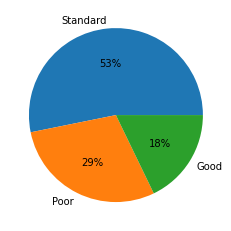

In [72]:
plt.pie(df['Credit_Score'].value_counts(), labels=df['Credit_Score'] .value_counts().index,autopct='%.0f%%')
plt.show()

In [73]:
cols = ['Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance', 'Interest_Rate', 'Total_EMI_per_month']


In [75]:
['Num_Bank_Accounts',
 'Num_Credit_Card',
 'Num_of_Loan',
 'Num_of_Delayed_Payment']
len(cols)

12

In [ ]:
# rows=[len(cols)//2 if len(cols)%2==0 else len(cols)//2+1]

# fig, axes=plt.subplots(rows[0],2,figsize=(10,30))
# ax = axes.flatten()
# for i,col in enumerate(cols):
#     sns.histplot(data=df, x=col, hue="Credit_Score", ax=ax[i], multiple="stack")

# plt.tight_layout()

### Outlier

In [76]:
df.shape

(100000, 21)

In [77]:
cat_df = df.select_dtypes('category')
num_df = df.select_dtypes(exclude='category')

In [78]:
cols = list(num_df.columns)

In [79]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Amount_invested_monthly,Monthly_Balance,Interest_Rate,Total_EMI_per_month
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.274560,1.764157e+05,4198.468568,5.367840,5.532320,3.532880,21.068780,13.262720,10.393543,5.794600,1426.220376,32.285173,221.136220,195.751837,403.120320,12.489280,105.543371
std,10.764438,1.429618e+06,3187.031426,2.592597,2.066543,2.446356,14.860104,6.200852,6.512529,3.831618,1155.129026,5.116875,99.680454,136.842331,175.470745,8.072728,125.810030
min,14.000000,7.005930e+03,303.645417,0.000000,0.000000,0.000000,-5.000000,0.000000,-5.010000,0.000000,0.230000,20.000000,1.000000,14.528879,92.841401,0.000000,0.000000
25%,24.000000,1.945750e+04,1625.744479,3.000000,4.000000,2.000000,10.000000,9.000000,5.500000,3.000000,566.072500,28.052567,144.000000,97.690749,284.546710,6.000000,29.049047
50%,33.000000,3.757861e+04,3097.016667,5.000000,5.000000,3.000000,18.000000,14.000000,9.340000,5.000000,1166.155000,32.305784,219.000000,152.081485,338.491580,11.000000,66.033915
75%,42.000000,7.279092e+04,5961.664375,7.000000,7.000000,5.000000,28.000000,18.000000,14.672500,8.500000,1945.962500,36.496663,302.000000,257.566585,465.372970,18.000000,145.582332
max,56.000000,2.419806e+07,15204.633333,10.000000,10.000000,9.000000,67.000000,28.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1005.847285,1349.264887,30.000000,1779.103254


In [80]:
a1 = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries']
a2 = ['Credit_Utilization_Ratio', 'Credit_History_Age']
a3 = ['Amount_invested_monthly', 'Monthly_Balance', 'Interest_Rate', 'Total_EMI_per_month']
a4 = ['Monthly_Inhand_Salary', 'Outstanding_Debt']
'Annual_Income'

'Annual_Income'

In [81]:
plt.figure(figsize=(20,10))
sns.boxplot(df[a1])
plt.xticks(rotation=30)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1440x720 with 0 Axes>

In [82]:
plt.figure(figsize=(10,5))
sns.boxplot(df[a2])
plt.xticks(rotation=30)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 720x360 with 0 Axes>

In [83]:
plt.figure(figsize=(20,10))
sns.boxplot(df[a3])
plt.xticks(rotation=30)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1440x720 with 0 Axes>

In [84]:
plt.figure(figsize=(20,5))
sns.boxplot(df[a4])
plt.xticks(rotation=30)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1440x360 with 0 Axes>

In [85]:
def remove_out(df_clean, num_cols, lbv=0.25, hbv=0.75):
    Q1 = df_clean[num_cols].quantile(lbv)
    Q3 = df_clean[num_cols].quantile(hbv)
    IQR = Q3-Q1
    lb = Q1-1.5*IQR
    hb = Q3+1.5*IQR
    for i in num_cols:
        df_clean = df_clean[(df_clean[i]>=lb[i]) & (df_clean[i]<=hb[i])]
    return df_clean


In [86]:
cols = ['Age', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Amount_invested_monthly', 'Monthly_Balance', 'Interest_Rate', 'Annual_Income']

In [87]:
df = remove_out(df, cols, lbv=0.2, hbv=0.9)
df.shape

(98826, 21)

In [ ]:
'Total_EMI_per_month'

## 6.Data Preprocessing

In [88]:
cat_df = df.select_dtypes('category')
num_df = df.select_dtypes(exclude='category')

In [90]:
for c in cat_df.columns:
  print(c)
  print(df[c].unique())
  #print()

Credit_Mix
['Good', 'Standard', 'Bad']
Categories (3, object): ['Bad', 'Good', 'Standard']
Payment_of_Min_Amount
['No', 'NM', 'Yes']
Categories (3, object): ['NM', 'No', 'Yes']
Payment_Behaviour
['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Large_value_payments']
Categories (6, object): ['High_spent_Large_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments']
Credit_Score
['Good', 'Standard', 'Poor']
Categories (3, object): ['Good', 'Poor', 'Standard']


### Encoding

In [91]:
df['Credit_Mix'] = df['Credit_Mix'].map({'Bad': 0, 'Standard': 1, 'Good': 2})
df['Credit_Score'] = df['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})

In [92]:
dummy_df = pd.get_dummies(df[['Payment_Behaviour', 'Payment_of_Min_Amount']], drop_first=True)

df = pd.concat([df, dummy_df], axis=1)
df = df.drop(['Payment_Behaviour', 'Payment_of_Min_Amount'], axis=1)

In [93]:
df['Credit_Mix'] = df['Credit_Mix'].astype('int')
df['Credit_Score'] = df['Credit_Score'].astype('int')

In [94]:
df.shape

(98826, 26)

### Data Spliting

In [95]:
XX = df.drop("Credit_Score", axis=1)
yy = df["Credit_Score"]

In [98]:
#sm = SMOTE()
from imblearn.over_sampling import SMOTE
X,y = SMOTE().fit_resample(XX, yy)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
X.shape

In [ ]:
y.value_counts()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, train_size=0.8, random_state=123
)

### Scaling

In [ ]:
num_columns = list(num_df.columns)

In [ ]:
scalar = PowerTransformer(method='yeo-johnson', standardize=True)

In [ ]:
X_train[num_columns] = scalar.fit_transform(X_train[num_columns])
X_test[num_columns] = scalar.transform(X_test[num_columns])

## 7.Model Building

### 7.1XGBClassifier

In [ ]:
xgb_cl = XGBClassifier(
 learning_rate=0.1,
 n_estimators=250,
 max_depth=8,
 min_child_weight=1,
 gamma=0,
 subsample=0.9,
 n_jobs=-1,
 tree_method='gpu_hist'
)

In [ ]:
%%time
xgb_cl.fit(X_train,y_train)

In [ ]:
y_pred_test = xgb_cl.predict(X_test)

accuracy_score(y_test, y_pred_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

In [ ]:
a = {'Poor': 0, 'Standard': 1, 'Good': 2}
list(a.keys())

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(a.keys()))
disp.plot()

In [ ]:
# Function to plot top 20 feature_importances
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features
    # features = features.head(20)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features

In [ ]:
top_featues = plot_feature_importances(xgb_cl.feature_importances_*100, X_train.columns)

### Hyperparameter tunning

In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
param_grid = {
    'max_depth': [5, 8],
    'n_estimators': [200, 250, 300],
    # 'learning_rate': [0.001, 0.1],
}

In [ ]:
estimator = XGBClassifier(learning_rate=0.1,
                          min_child_weight=1,
                          gamma=0,
                          subsample=0.9,
                          class_weight='balanced',
                          random_state=42,
                          n_jobs=-1,
                          tree_method='gpu_hist')

xgb_search = RandomizedSearchCV(estimator, param_distributions=param_grid, scoring='roc_auc', cv=folds, verbose=2,
                               random_state=42, return_train_score=True, n_jobs=-1)

In [ ]:
%%time
xgb_search.fit(X_train, y_train)

In [ ]:
# best estimator
xgb_best = xgb_search.best_estimator_
xgb_best

In [ ]:
%%time
xgb_best_model = xgb_best.fit(X_train, y_train)

In [ ]:
y_pred_test = xgb_best_model.predict(X_test)
accuracy_score(y_test, y_pred_test)

In [ ]:
print(classification_report(y_test, y_pred_test))

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(a.keys()))
disp.plot()

In [ ]:
top_featues = plot_feature_importances(xgb_best_model.feature_importances_*100, X_train.columns)